In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Books_Data_Clean.csv')
df.head()

,index,Publishing Year,Book Name,Author,language_code,Author_Rating,Book_average_rating,Book_ratings_count,genre,gross sales,publisher revenue,sale price,sales rank,Publisher,units sold
0,0,1975.0,Beowulf,"Unknown, Seamus Heaney",en-US,Novice,3.42,155903,genre fiction,34160.0,20496.0,4.88,1,HarperCollins Publishers,7000
1,1,1987.0,Batman: Year One,"Frank Miller, David Mazzucchelli, Richmond Lew...",eng,Intermediate,4.23,145267,genre fiction,12437.5,7462.5,1.99,2,HarperCollins Publishers,6250
2,2,2015.0,Go Set a Watchman,Harper Lee,eng,Novice,3.31,138669,genre fiction,47795.0,28677.0,8.69,3,"Amazon Digital Services, Inc.",5500
3,3,2008.0,When You Are Engulfed in Flames,David Sedaris,en-US,Intermediate,4.04,150898,fiction,41250.0,24750.0,7.50,3,Hachette Book Group,5500
4,4,2011.0,Daughter of Smoke & Bone,Laini Taylor,eng,Intermediate,4.04,198283,genre fiction,37952.5,22771.5,7.99,4,Penguin Group (USA) LLC,4750


In [3]:
df.describe()

,index,Publishing Year,Book_average_rating,Book_ratings_count,gross sales,publisher revenue,sale price,sales rank,units sold
count,1070.000000,1069.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000
mean,534.500000,1971.377923,4.007000,94909.913084,1856.622944,843.281030,4.869561,611.652336,9676.980374
std,309.026698,185.080257,0.247244,31513.242518,3936.924240,2257.596743,3.559919,369.849830,15370.571306
min,0.000000,-560.000000,2.970000,27308.000000,104.940000,0.000000,0.990000,1.000000,106.000000
25%,267.250000,1985.000000,3.850000,70398.000000,372.465000,0.000000,1.990000,287.500000,551.250000
50%,534.500000,2003.000000,4.015000,89309.000000,809.745000,273.078000,3.990000,595.500000,3924.000000
75%,801.750000,2010.000000,4.170000,113906.500000,1487.957500,721.180500,6.990000,932.500000,5312.250000
max,1069.000000,2016.000000,4.770000,206792.000000,47795.000000,28677.000000,33.860000,1273.000000,61560.000000


In [4]:
# pd.set_option('display.max_rows', None)           * use to give the entie rows of the  columns output rather then colaps the rows

df['Publishing Year'].value_counts()

Publishing Year
2012.0    68
2011.0    55
2009.0    46
2010.0    44
2006.0    41
          ..
1916.0     1
1320.0     1
1667.0     1
1964.0     1
1879.0     1
Name: count, Length: 150, dtype: int64

In [5]:
# get the books only where years are positive 

df =df[df['Publishing Year'] > 1900]

In [6]:
df.describe()

,index,Publishing Year,Book_average_rating,Book_ratings_count,gross sales,publisher revenue,sale price,sales rank,units sold
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000
mean,535.926660,1994.730426,4.012230,94817.793855,1832.644985,841.360638,4.844311,613.314172,9744.482656
std,308.769358,23.204719,0.246492,31473.890412,3947.885096,2279.579848,3.561712,369.628663,15350.021050
min,0.000000,1901.000000,2.970000,27308.000000,104.940000,0.000000,0.990000,1.000000,106.000000
25%,271.000000,1989.000000,3.860000,70701.000000,366.300000,0.000000,1.990000,291.000000,570.000000
50%,535.000000,2003.000000,4.030000,89204.000000,792.000000,273.240000,3.990000,596.000000,3942.000000
75%,802.000000,2010.000000,4.180000,113400.000000,1470.260000,714.756000,6.990000,933.000000,5427.000000
max,1069.000000,2016.000000,4.770000,206792.000000,47795.000000,28677.000000,33.860000,1273.000000,61560.000000


### Check The Null Values in Each Columns

In [7]:
df.isnull().sum()

index                   0
Publishing Year         0
Book Name              21
Author                  0
language_code          49
Author_Rating           0
Book_average_rating     0
Book_ratings_count      0
genre                   0
gross sales             0
publisher revenue       0
sale price              0
sales rank              0
Publisher               0
units sold              0
dtype: int64

### Drop The Book Which Doesn't Contain Any Name

In [8]:
df.dropna(subset = 'Book Name', inplace = True)

In [9]:
df.isnull().sum()

index                   0
Publishing Year         0
Book Name               0
Author                  0
language_code          47
Author_Rating           0
Book_average_rating     0
Book_ratings_count      0
genre                   0
gross sales             0
publisher revenue       0
sale price              0
sales rank              0
Publisher               0
units sold              0
dtype: int64

### Fill the null language_code with the most friquent value

In [10]:
df['language_code'] = df['language_code'].fillna(df['language_code'].mode()[0])

### Check The Duplicate Values

In [11]:
df.duplicated().sum()

0

In [12]:
df['Book Name'].duplicated().sum()

1

In [13]:
df.nunique()

index                  988
Publishing Year        101
Book Name              987
Author                 669
language_code            8
Author_Rating            4
Book_average_rating    133
Book_ratings_count     983
genre                    4
gross sales            774
publisher revenue      570
sale price             143
sales rank             818
Publisher                9
units sold             470
dtype: int64

### Distribution of Publishing Year

Text(0.5, 1.0, 'Distribution of Publishing Year')

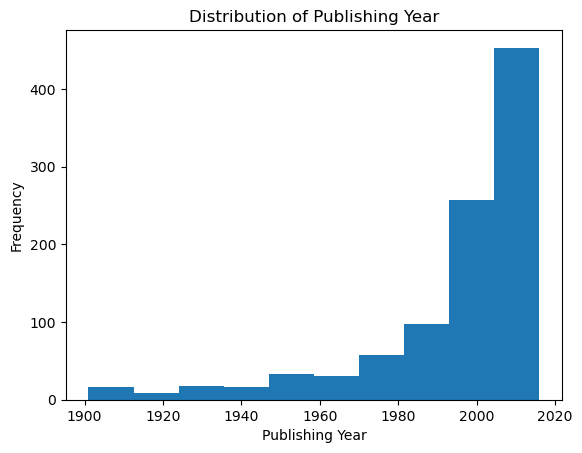

In [14]:
plt.hist(df['Publishing Year'])
plt.xlabel('Publishing Year')
plt.ylabel('Frequency')
plt.title('Distribution of Publishing Year')

### Number of books in Each Genre

In [15]:
df['genre'].value_counts()

genre
genre fiction    759
nonfiction       160
fiction           54
children          15
Name: count, dtype: int64

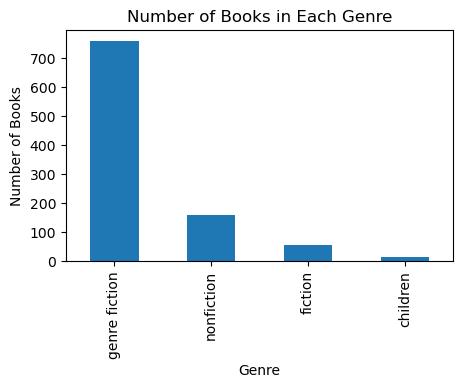

In [16]:
plt.figure(figsize=(5,3))
df['genre'].value_counts().plot(kind = 'bar')
plt.xlabel('Genre')
plt.ylabel('Number of Books')
plt.title('Number of Books in Each Genre')
plt.show()

### Gethe The Top rated Auther 

In [17]:
df.groupby('Author')['Book_average_rating'].mean().sort_values(ascending = False)

Author
Bill Watterson                  4.650000
Bill Watterson, G.B. Trudeau    4.610000
J.R.R. Tolkien                  4.590000
George R.R. Martin              4.560000
Sarah J. Maas                   4.526000
                                  ...   
Chetan Bhagat                   3.273333
Audrey Niffenegger              3.230000
Herman Koch, Sam Garrett        3.220000
P.D. James                      3.210000
Sue Monk Kidd                   3.100000
Name: Book_average_rating, Length: 669, dtype: float64

### Book Rating For Each Genre

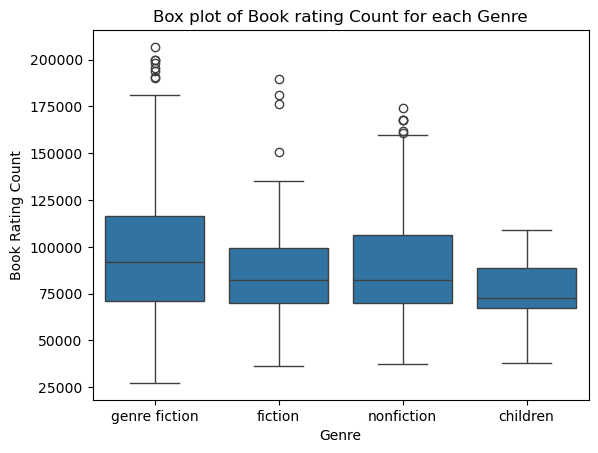

In [18]:
sns.boxplot(x ='genre', y = 'Book_ratings_count', data = df)
plt.xlabel('Genre')
plt.ylabel('Book Rating Count')
plt.title('Box plot of Book rating Count for each Genre')
plt.show()

### Sale Price Vs Unit Sold

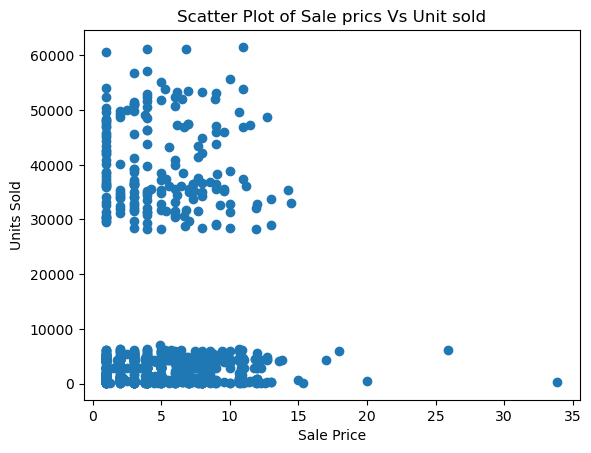

In [19]:
plt.scatter(df['sale price'], df['units sold'])
plt.xlabel('Sale Price')
plt.ylabel('Units Sold')
plt.title('Scatter Plot of Sale prics Vs Unit sold')
plt.show()

### Language Distribution of Books

In [20]:
df['language_code'].value_counts()

language_code
eng      717
en-US    226
en-GB     29
en-CA      7
fre        4
spa        2
ara        2
nl         1
Name: count, dtype: int64

In [21]:
language_count = df['language_code'].value_counts()

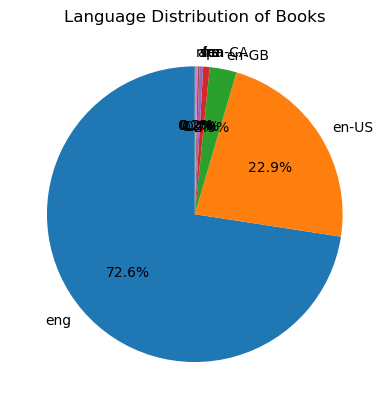

In [22]:
plt.pie(language_count, labels = language_count.index, startangle = 90, autopct = "%1.1f%%")
plt.title('Language Distribution of Books')
plt.show()

### Get each publisher Revenue 

In [23]:
df['Publisher '].value_counts()

Publisher 
Amazon Digital Services,  Inc.          561
Random House LLC                        113
Penguin Group (USA) LLC                  93
HarperCollins Publishers                 63
Hachette Book Group                      56
Simon and Schuster Digital Sales Inc     55
Macmillan                                39
HarperCollins Publishing                  4
HarperCollins Christian Publishing        4
Name: count, dtype: int64

In [24]:
df.groupby('Publisher ')['publisher revenue'].sum().sort_values(ascending = False)

Publisher 
Penguin Group (USA) LLC                 191581.104
Random House LLC                        174956.244
Amazon Digital Services,  Inc.          141767.772
HarperCollins Publishers                121769.814
Hachette Book Group                     107410.968
Simon and Schuster Digital Sales Inc     46858.206
Macmillan                                31249.830
HarperCollins Publishing                  2830.806
HarperCollins Christian Publishing        2135.670
Name: publisher revenue, dtype: float64

###  Auther Rating categories

In [25]:
df.groupby('Author_Rating')['Book_ratings_count'].mean().sort_values(ascending = False)

Author_Rating
Intermediate    101400.272569
Famous           98295.250000
Novice           87318.464286
Excellent        83804.800595
Name: Book_ratings_count, dtype: float64

### Number of Books in each language

In [26]:
df.groupby('language_code').size()

language_code
ara        2
en-CA      7
en-GB     29
en-US    226
eng      717
fre        4
nl         1
spa        2
dtype: int64

In [27]:
df['language_code'].value_counts()

language_code
eng      717
en-US    226
en-GB     29
en-CA      7
fre        4
spa        2
ara        2
nl         1
Name: count, dtype: int64

### Avrage Rating VS Book rating count

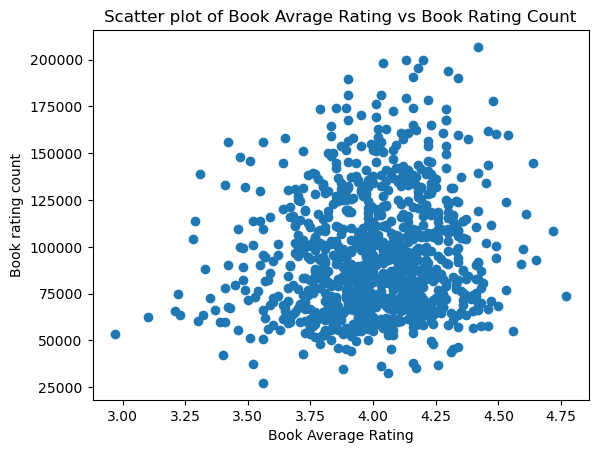

In [28]:
plt.scatter(df['Book_average_rating'], df['Book_ratings_count'])
plt.xlabel('Book Average Rating')
plt.ylabel('Book rating count')
plt.title('Scatter plot of Book Avrage Rating vs Book Rating Count')
plt.show()

### Each Author Gross sales

In [29]:
total_sale_author = df.groupby('Author')['gross sales'].sum().sort_values(ascending = False)
total_sale_author

Author
Harper Lee              47795.00
Stephen King            43322.65
David Sedaris           42323.41
Charlaine Harris        39453.08
Laini Taylor            38278.41
                          ...   
Frank Warren              107.91
Ayaan Hirsi Ali           107.91
Walter M. Miller Jr.      106.92
Michael Shaara            105.93
Blake Crouch              105.93
Name: gross sales, Length: 669, dtype: float64

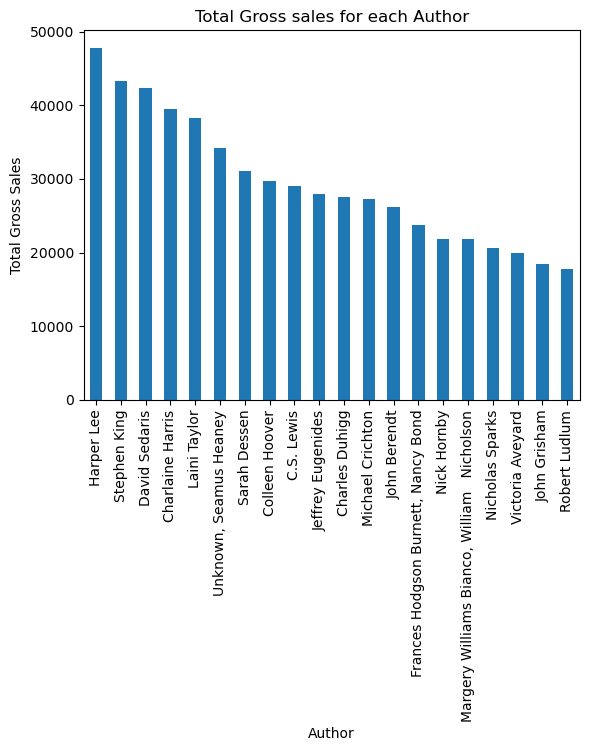

In [30]:
total_sale_author = df.groupby('Author')['gross sales'].sum().sort_values(ascending = False).head(20)

total_sale_author.plot(kind = 'bar')
plt.xlabel('Author')
plt.ylabel('Total Gross Sales')
plt.title('Total Gross sales for each Author')
plt.show()

### Box plot over Unit Sales for each Author Rating

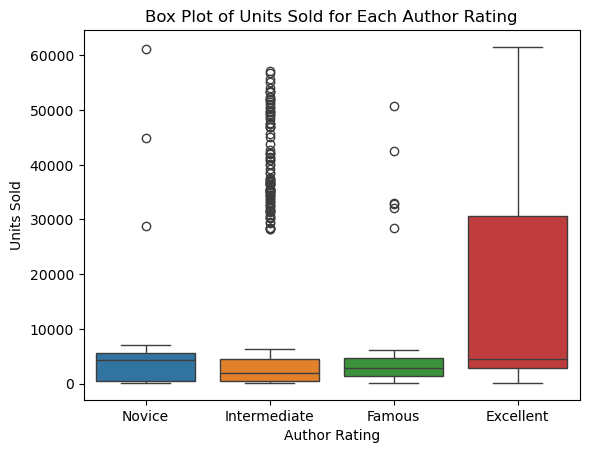

In [31]:
sns.boxplot(x = 'Author_Rating', y ='units sold', data = df, hue = 'Author_Rating')
plt.xlabel('Author Rating')
plt.ylabel('Units Sold')
plt.title('Box Plot of Units Sold for Each Author Rating')
plt.show()

### Unit Sold over the year

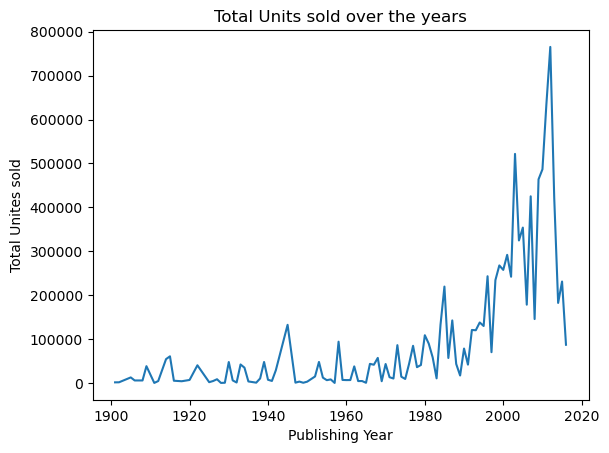

In [32]:
df.groupby('Publishing Year')['units sold'].sum().plot(kind = 'line')
plt.xlabel('Publishing Year')
plt.ylabel('Total Unites sold')
plt.title('Total Units sold over the years')
plt.show()